# Hypothesis_Testing
A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. 

The dataset was obtained from [Datacamps](https://app.datacamp.com/workspace/w/5676b52c-f920-4154-b278-a83efcf063a5/edit/drug_safety.csv). It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.


The question you are trying to determine the answer to is:

Are there is a significant difference between the ages of the Drug and Placebo groups?

You assume a 0.05 significance level, and use the following null and alternative hypotheses:

> ***H0*** **There is no significant difference in ages between the Drug and Placebo groups.**

> ***H1*** **There is a significant difference in ages between the Drug and Placebo groups.**

In [1]:
# import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# import dataset
drug_safety = pd.read_csv('datasets/drug_safety.csv')
drug_safety.head()

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


In [3]:
# check if there any missing value
drug_safety.isnull().sum()

age                   0
sex                   0
trx                   0
week                  0
wbc                6975
rbc                6976
adverse_effects       0
num_effects           0
dtype: int64

In [4]:
# check the shape of dataset
drug_safety.shape

(16103, 8)

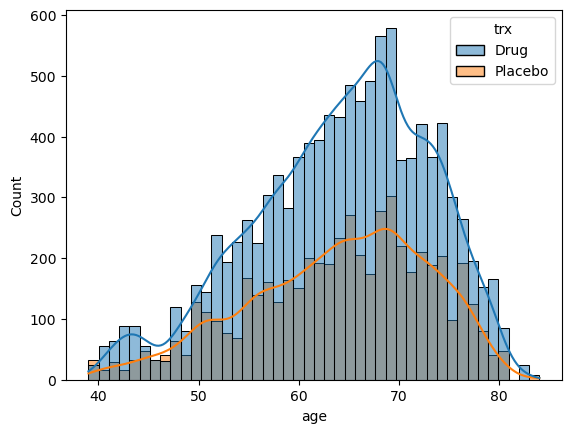

In [5]:
# Check normality by plotting a histogram

sns.histplot(data=drug_safety, x='age', hue='trx', kde=True)
plt.show()

Since the our data is not normally distributed and, but if we are still not use about the normality we can use a **Shapiro-Wilk test** to check the normality of distribution.

In [6]:
# Filter the data
age_drug = drug_safety[drug_safety['trx'] == 'Drug']['age']
age_placebo = drug_safety[drug_safety['trx'] == 'Placebo']['age']

In [7]:
# Shapiro-Wilk test
stat_drug, p_value_drug = stats.shapiro(age_drug)
stat_placebo, p_value_placebo = stats.shapiro(age_placebo)

# Check if the data may be approximately normally distributed
alpha = 0.05
if p_value_drug > alpha:
    print('Drug Group. Data may be approximately normally distributed.')
else:
    print('Drug Group. Data may not be approximately normally distributed.')

if p_value_placebo > alpha:
    print('Placebo Group. Data may be approximately normally distributed.')
else:
    print('Placebo Group. Data may not be approximately normally distributed.')

Drug Group. Data may not be approximately normally distributed.
Placebo Group. Data may not be approximately normally distributed.


/Users/arwa/Applications/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Now let's comparing two independent samples from populations by using a non-parametric test: **The Wilcoxon-Mann-Whitney (WMW) test**

In [8]:
# Perform a right-tailed Wilcoxon-Mann-Whitney (WMW) test

t_statistic, p_value = stats.mannwhitneyu(age_drug, age_placebo)

In [9]:
t_statistic, p_value

(29149339.5, 0.25696267004066287)

The test result shows that the t value is `29149339.5`. This is a standardized metric that reveals the deviation of the sample mean from the null hypothesis. The p value is what gives us our final answer. Our p-value is telling us how often our result would appear by chance. 

We are interested in how our p-value compares to our significance level:

> • If the p-value is less than the significance level, then we can reject the null hypothesis

> • If the p-value is greater than the significance level, then we failed to reject the null hypothesis

In [10]:
if p_value <= alpha:
    result = print("Reject the Null Hypothesis")
else:
    result = print("Fail to reject the Null Hypothesis")

Fail to reject the Null Hypothesis


So, when **`p_value` > 0.05** (our chosen significance level), which means that we may reject our null hypothesis in favor for the alternative. 

This mean there is not a significant difference in ages between the Drug and Placebo groups based on the chosen significance level.